In [1]:
from htrace import Parse
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

%config InlineBackend.figure_formats = ['svg']
sns.set_style("whitegrid")

In [68]:
always = Parse('wordcount/a/1.out', False)

21it [00:11,  1.86it/s]


In [45]:
a = always.df['name'].value_counts().to_frame()
a['sampler'] = 'always'
a['count'] = a['name']

In [80]:
prob = Parse('wordcount/probability/1.out', False)

21it [00:03,  5.65it/s]


In [47]:
p = prob.df['name'].value_counts().to_frame()
p['sampler'] = 'prob'
p['count'] = p['name']

In [48]:
number = Parse('wordcount/number/1.out', False)

21it [00:00, 351.59it/s]


In [49]:
n = number.df['name'].value_counts().to_frame()
n['sampler'] = 'number'
n['count'] = n['name']

In [77]:
limit = Parse('wordcount/limit/1.out', False)

21it [00:00, 137.32it/s]


In [51]:
l = limit.df['name'].value_counts().to_frame()
l['sampler'] = 'limit'
l['count'] = l['name']

In [81]:
tbuck = Parse('wordcount/tbuck/1.out', False)

21it [00:00, 161.11it/s]


In [53]:
t = tbuck.df['name'].value_counts().to_frame()
t['sampler'] = 'tbuck'
t['count'] = t['name']

In [54]:
c = pd.concat([n,l,t,p])
c['name'] = c.index
d = c[c['name']=='DFSInputStream#byteArrayRead']
c = c[c['name']!='DFSInputStream#byteArrayRead']

In [55]:
def func_time_dist(df, name="", bins=30):
    df['begin'] = df['begin'] - df['begin'].min()
    if name == "":
        hist = sns.distplot(df['begin'], kde=False, bins=bins)
    else:
        func = df[df['name']==name]
        hist = sns.distplot(func['begin'], kde=False, bins=bins)
    hist.set(xlabel=name+" time/s", ylabel="count/number")

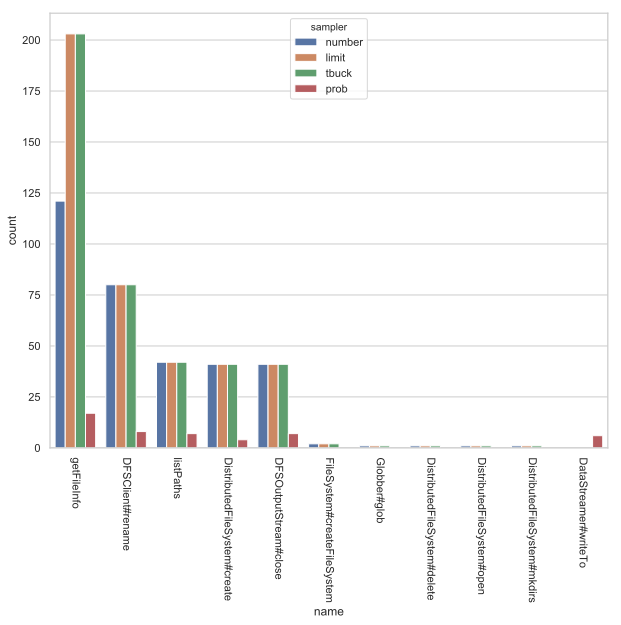

In [56]:
f, ax= plt.subplots(figsize = (10, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
sns.barplot(x='name', y='count', hue='sampler', data=c)

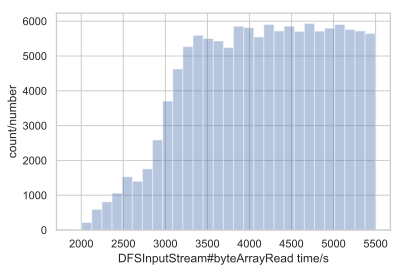

In [57]:
func_time_dist(always.df, name="DFSInputStream#byteArrayRead", bins=30)

/Users/yangs/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


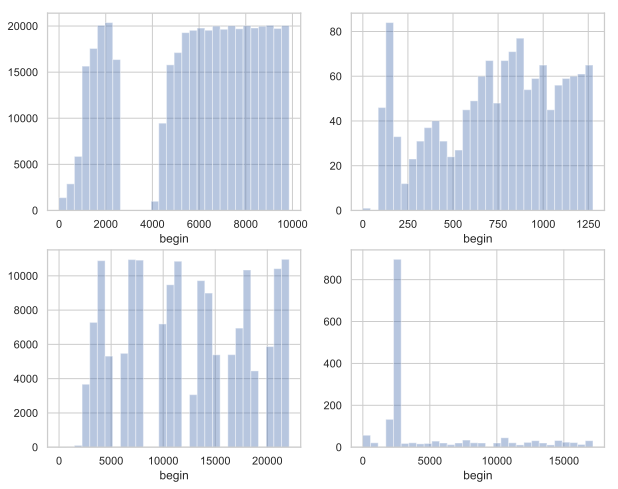

In [83]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize = (10, 8))
def timedata(always):
    at = always.df
    at = at[at['name']=='DFSInputStream#byteArrayRead']
    at['begin'] = at['begin'] - at['begin'].min()
    return at
charts = [always, number, prob, tbuck]
for i in range(2):
    for j in range(2):   
#         axes[i,j].hist(timedata(charts[i*2+j])['begin'], bins=40)
        sns.distplot(timedata(charts[i*2+j])['begin'], bins=30, ax=axes[i,j], kde=False)

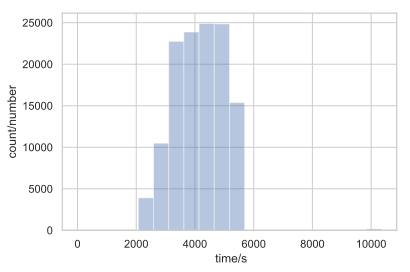

In [59]:
func_time_dist(always.df, name="", bins=20)

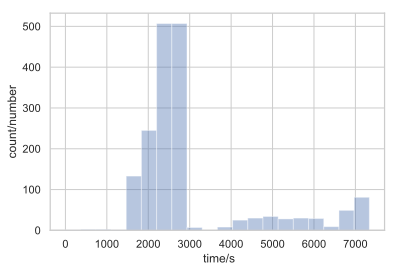

In [60]:
func_time_dist(number.df, name="", bins=20)

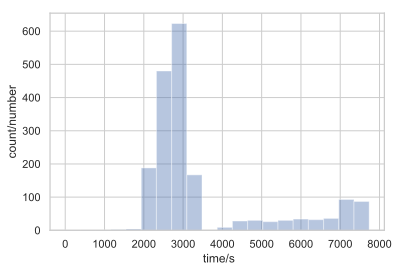

In [61]:
func_time_dist(limit.df, name="", bins=20)

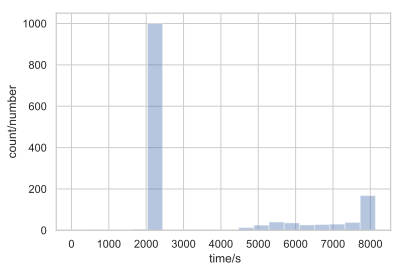

In [62]:
func_time_dist(tbuck.df, name="", bins=20)

In [63]:
import math

In [42]:
x = np.array(range(1, 200))
y = list(map(lambda x: 1 - math.exp(-100/x**2), x))

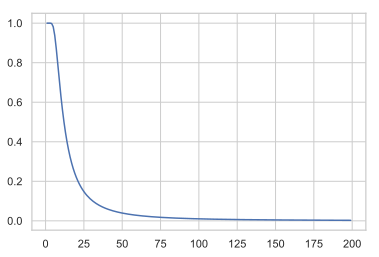

In [43]:
sns.lineplot(x=x,y=y)

In [79]:
limit.df['name'].value_counts().to_frame()

,name
DFSInputStream#byteArrayRead,5797
getFileInfo,203
DFSClient#rename,80
listPaths,42
DistributedFileSystem#create,41
DFSOutputStream#close,41
FileSystem#createFileSystem,2
DistributedFileSystem#delete,1
DistributedFileSystem#open,1
Globber#glob,1


In [74]:
always.df['name'].value_counts().to_frame()

,name
DFSInputStream#byteArrayRead,420617
DFSOutputStream#write,6925
getFileInfo,214
DFSClient#rename,80
listPaths,43
DFSOutputStream#close,42
DistributedFileSystem#create,42
hflush,40
DistributedFileSystem#open,3
FileSystem#createFileSystem,2
